# Donation calculation

## Here I establish how to get levels of guild players from console in the player list page

In [1]:
# js:
#
# --------------
#
# let ppl = []
# const pl = $("#mainbox tbody tr").toArray()
# for(const line in pl) {
#    if (line == 0) continue;
#    if (line == 24) break;
#    const cols = pl[line].querySelectorAll("td");
#    console.log(cols);
#    ppl.push({
#        name: cols[0].innerText,
#        lvl: cols[2].innerText
#    })
# }
# console.log(ppl);

## Actual calculation

[[10, 0], [25, 0], [40, 15], [55, 5], [70, 3], [85, 3], [100, 0]]
Hráči pod úrovní 10 přispějí 26000 zlatých
Hráči pod úrovní 25 přispějí 52000 zlatých
Hráči pod úrovní 40 přispějí 104000 zlatých
Hráči pod úrovní 55 přispějí 208000 zlatých
Hráči pod úrovní 70 přispějí 416000 zlatých
Hráči pod úrovní 85 přispějí 832000 zlatých
Hráči pod úrovní 100 přispějí 1664000 zlatých


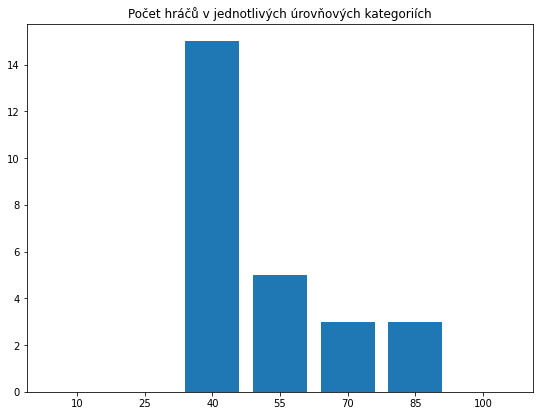

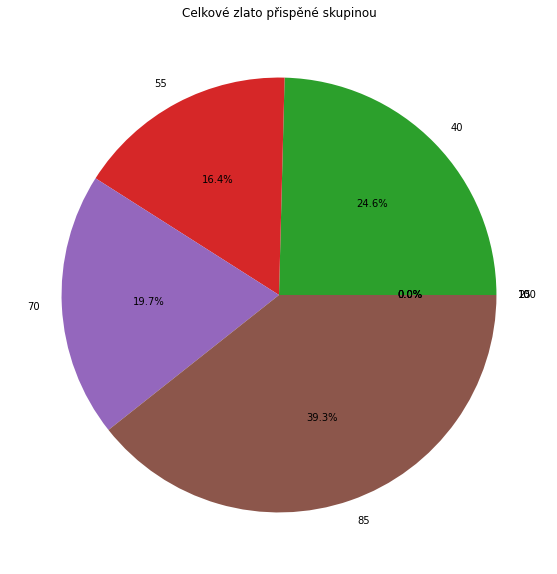

In [1]:
import matplotlib.pyplot as plt

goal = 6_294_772

levels = [
    {
        "name": "_-_",
        "lvl": "50"
    },
    {
        "name": "Masakrov",
        "lvl": "73"
    },
    {
        "name": "Ignemia",
        "lvl": "83"
    },
    {
        "name": "AugustaDomitius",
        "lvl": "73"
    },
    {
        "name": "MorpheusBlack",
        "lvl": "55"
    },
    {
        "name": "ConsulMajorian",
        "lvl": "53"
    },
    {
        "name": "Qwer_CZ",
        "lvl": "31"
    },
    {
        "name": "Drobek",
        "lvl": "33"
    },
    {
        "name": "ElMaroon",
        "lvl": "37"
    },
    {
        "name": "Markhaider",
        "lvl": "36"
    },
    {
        "name": "Gilisnes",
        "lvl": "32"
    },
    {
        "name": "Spartias",
        "lvl": "43"
    },
    {
        "name": "Slapi",
        "lvl": "36"
    },
    {
        "name": "Kosi",
        "lvl": "33"
    },
    {
        "name": "Flaminius",
        "lvl": "34"
    },
    {
        "name": "PrefectGnaeus",
        "lvl": "28"
    },
    {
        "name": "Kroupic",
        "lvl": "34"
    },
    {
        "name": "Syropeus",
        "lvl": "32"
    },
    {
        "name": "Achilles*96",
        "lvl": "25"
    },
    {
        "name": "Kerrang!!!",
        "lvl": "63"
    },
    {
        "name": "Guinso",
        "lvl": "59"
    },
    {
        "name": "AedileIulianus",
        "lvl": "29"
    },
    {
        "name": "Dejv95",
        "lvl": "44"
    },
    {
        "name": "PaterAgrippa",
        "lvl": "35"
    },
    {
        "name": "Zemicos",
        "lvl": "25"
    },
    {
        "name": "IkoBudwarek",
        "lvl": "42"
    }
]

money_groups = [10,25,40,55,70,85,100]

level_list = [[x, 0] for x in money_groups]

for pl in levels:
    for index, group in enumerate(money_groups):
        if int(pl["lvl"]) <  group:
            level_list[index][1]+=1;
            break
    
level_list.sort()

print(level_list)

base_money = 14000
group_scale_factor = 2

total = 0

while True:
    for index, level_group in enumerate(level_list):
        group_sum = int((group_scale_factor**index)*level_group[1])*base_money
        total += group_sum
        #print(level_group[1], group_sum, total)
        
        
    if total < goal:
        total = 0
        base_money += 250
        #print("\n-------------\nTrying again with:", base_money)
    else:
        #print("\n-------------\nFinal base:", base_money, "\n\n")
        break
        

recount = 0
for index, group in enumerate(level_list):
    recount += int((group_scale_factor**index)*base_money)*group[1]
    print(f"Hráči pod úrovní {group[0]} přispějí {int((group_scale_factor**index)*base_money)} zlatých")
    
hist, ax0 = plt.subplots()
hist.tight_layout()
ax0.set_title("Počet hráčů v jednotlivých úrovňových kategoriích")
hist.set_size_inches(8,6)
ax0.bar([str(x[0]) for x in level_list], [x[1] for x in level_list])
piech, ax1 = plt.subplots()
ax1.set_title("Celkové zlato přispěné skupinou")
piech.set_size_inches(10,10)
_ = ax1.pie([(int((group_scale_factor**(divmod(x[0], 15)[0]))*base_money)*x[1]) for x in level_list], labels=[str(x[0]) for x in level_list], autopct='%.1f%%')
